In [74]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,constraints
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from libs import archanjo as arch
import cv2
import matplotlib.pyplot as plt
import os
import cv2
# import cv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler



In [75]:
print(tf.__version__)

2.6.2


In [76]:
categorias = [0,1]
categorias_string = ["Hipertensos_Repouso_65_75_Supino","Saudaveis_Repouso_20_30_Supino"]

path_base = "/home/rafael/Documentos/FACOM/Mestrado/Materias/Defesa/Pesquisa/DSP/DataSet_VFC/New_Set/data/"


data_frame_cat = []
data_frame_numpy= []

for x in categorias:
    for class_data_dict in arch.coleta_dados(path_base + categorias_string[x]):
        name_user = class_data_dict[0]
        data = class_data_dict[1]
        sem_outliers = arch.removeoutlier(data.copy(), debug=False)
        estacionario = arch.select_estavel(sem_outliers)
        for data_ in estacionario:
            data_frame_cat.append(x)
            data_frame_numpy.append(data_[1])




In [77]:
data_frame_cat = np.array(data_frame_cat,dtype=np.int)
data_frame_numpy= np.array(data_frame_numpy,dtype=np.int)
rus = RandomUnderSampler(random_state=120)
train_images_balance_s_temp,train_labels_balance_s_temp = rus.fit_resample(data_frame_numpy,data_frame_cat)
train_labels_balance_s =train_labels_balance_s_temp

dimensao=(-1,16,16)
train_images_balance_s_temp=train_images_balance_s_temp.reshape(dimensao)


In [78]:
ponse=arch.origpons(16)
train_images_balance_s=[]
for data in train_images_balance_s_temp:
    ponse_d=arch.multipli_matriz(ponse,data,16)
    train_images_balance_s.append(np.abs(np.round(ponse_d,2)))


train_images_balance_s=np.array(train_images_balance_s)


In [79]:
dimensao=(-1,16,16,1)
train_images_balance_s=train_images_balance_s.reshape(dimensao)

train_images_balance_s=np.round(train_images_balance_s/1500,2)

In [80]:
print(data_frame_numpy.shape)
print(data_frame_cat.shape)
print(train_images_balance_s.shape)
print(train_labels_balance_s.shape)


(162, 256)
(162,)
(58, 16, 16, 1)
(58,)


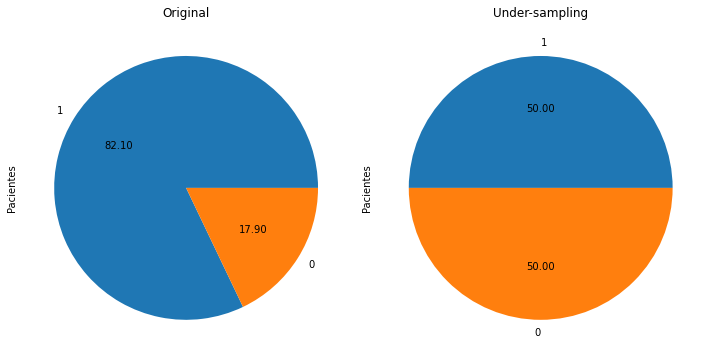

In [81]:
autopct = "%.2f"

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].set_title("Original")
pd.Series(name='Pacientes',data=data_frame_cat).value_counts().plot.pie(autopct=autopct, ax=axs[0])

pd.Series(name='Pacientes',data=train_labels_balance_s).value_counts().plot.pie( autopct=autopct,ax=axs[1])

axs[1].set_title("Under-sampling")
fig.tight_layout()


In [82]:


train_images_balance, teste_images_predic, train_labels_balance, test_labels_predic = train_test_split(train_images_balance_s, train_labels_balance_s, shuffle=True, random_state=10, train_size=0.8)



print(train_labels_balance)
print(test_labels_predic)



print(train_labels_balance.shape)

print(test_labels_predic.shape)

[0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 0 0 1 0]
[1 0 1 0 0 0 1 0 0 0 1 1]
(46,)
(12,)


In [83]:

train_images, test_images, train_labels, test_labels = train_test_split(train_images_balance,train_labels_balance , shuffle=True, random_state=120, train_size=0.8)

print(train_images.shape)

print(test_images.shape)


(36, 16, 16, 1)
(10, 16, 16, 1)


[0 1 1 0 0 0 1 0 0 1]


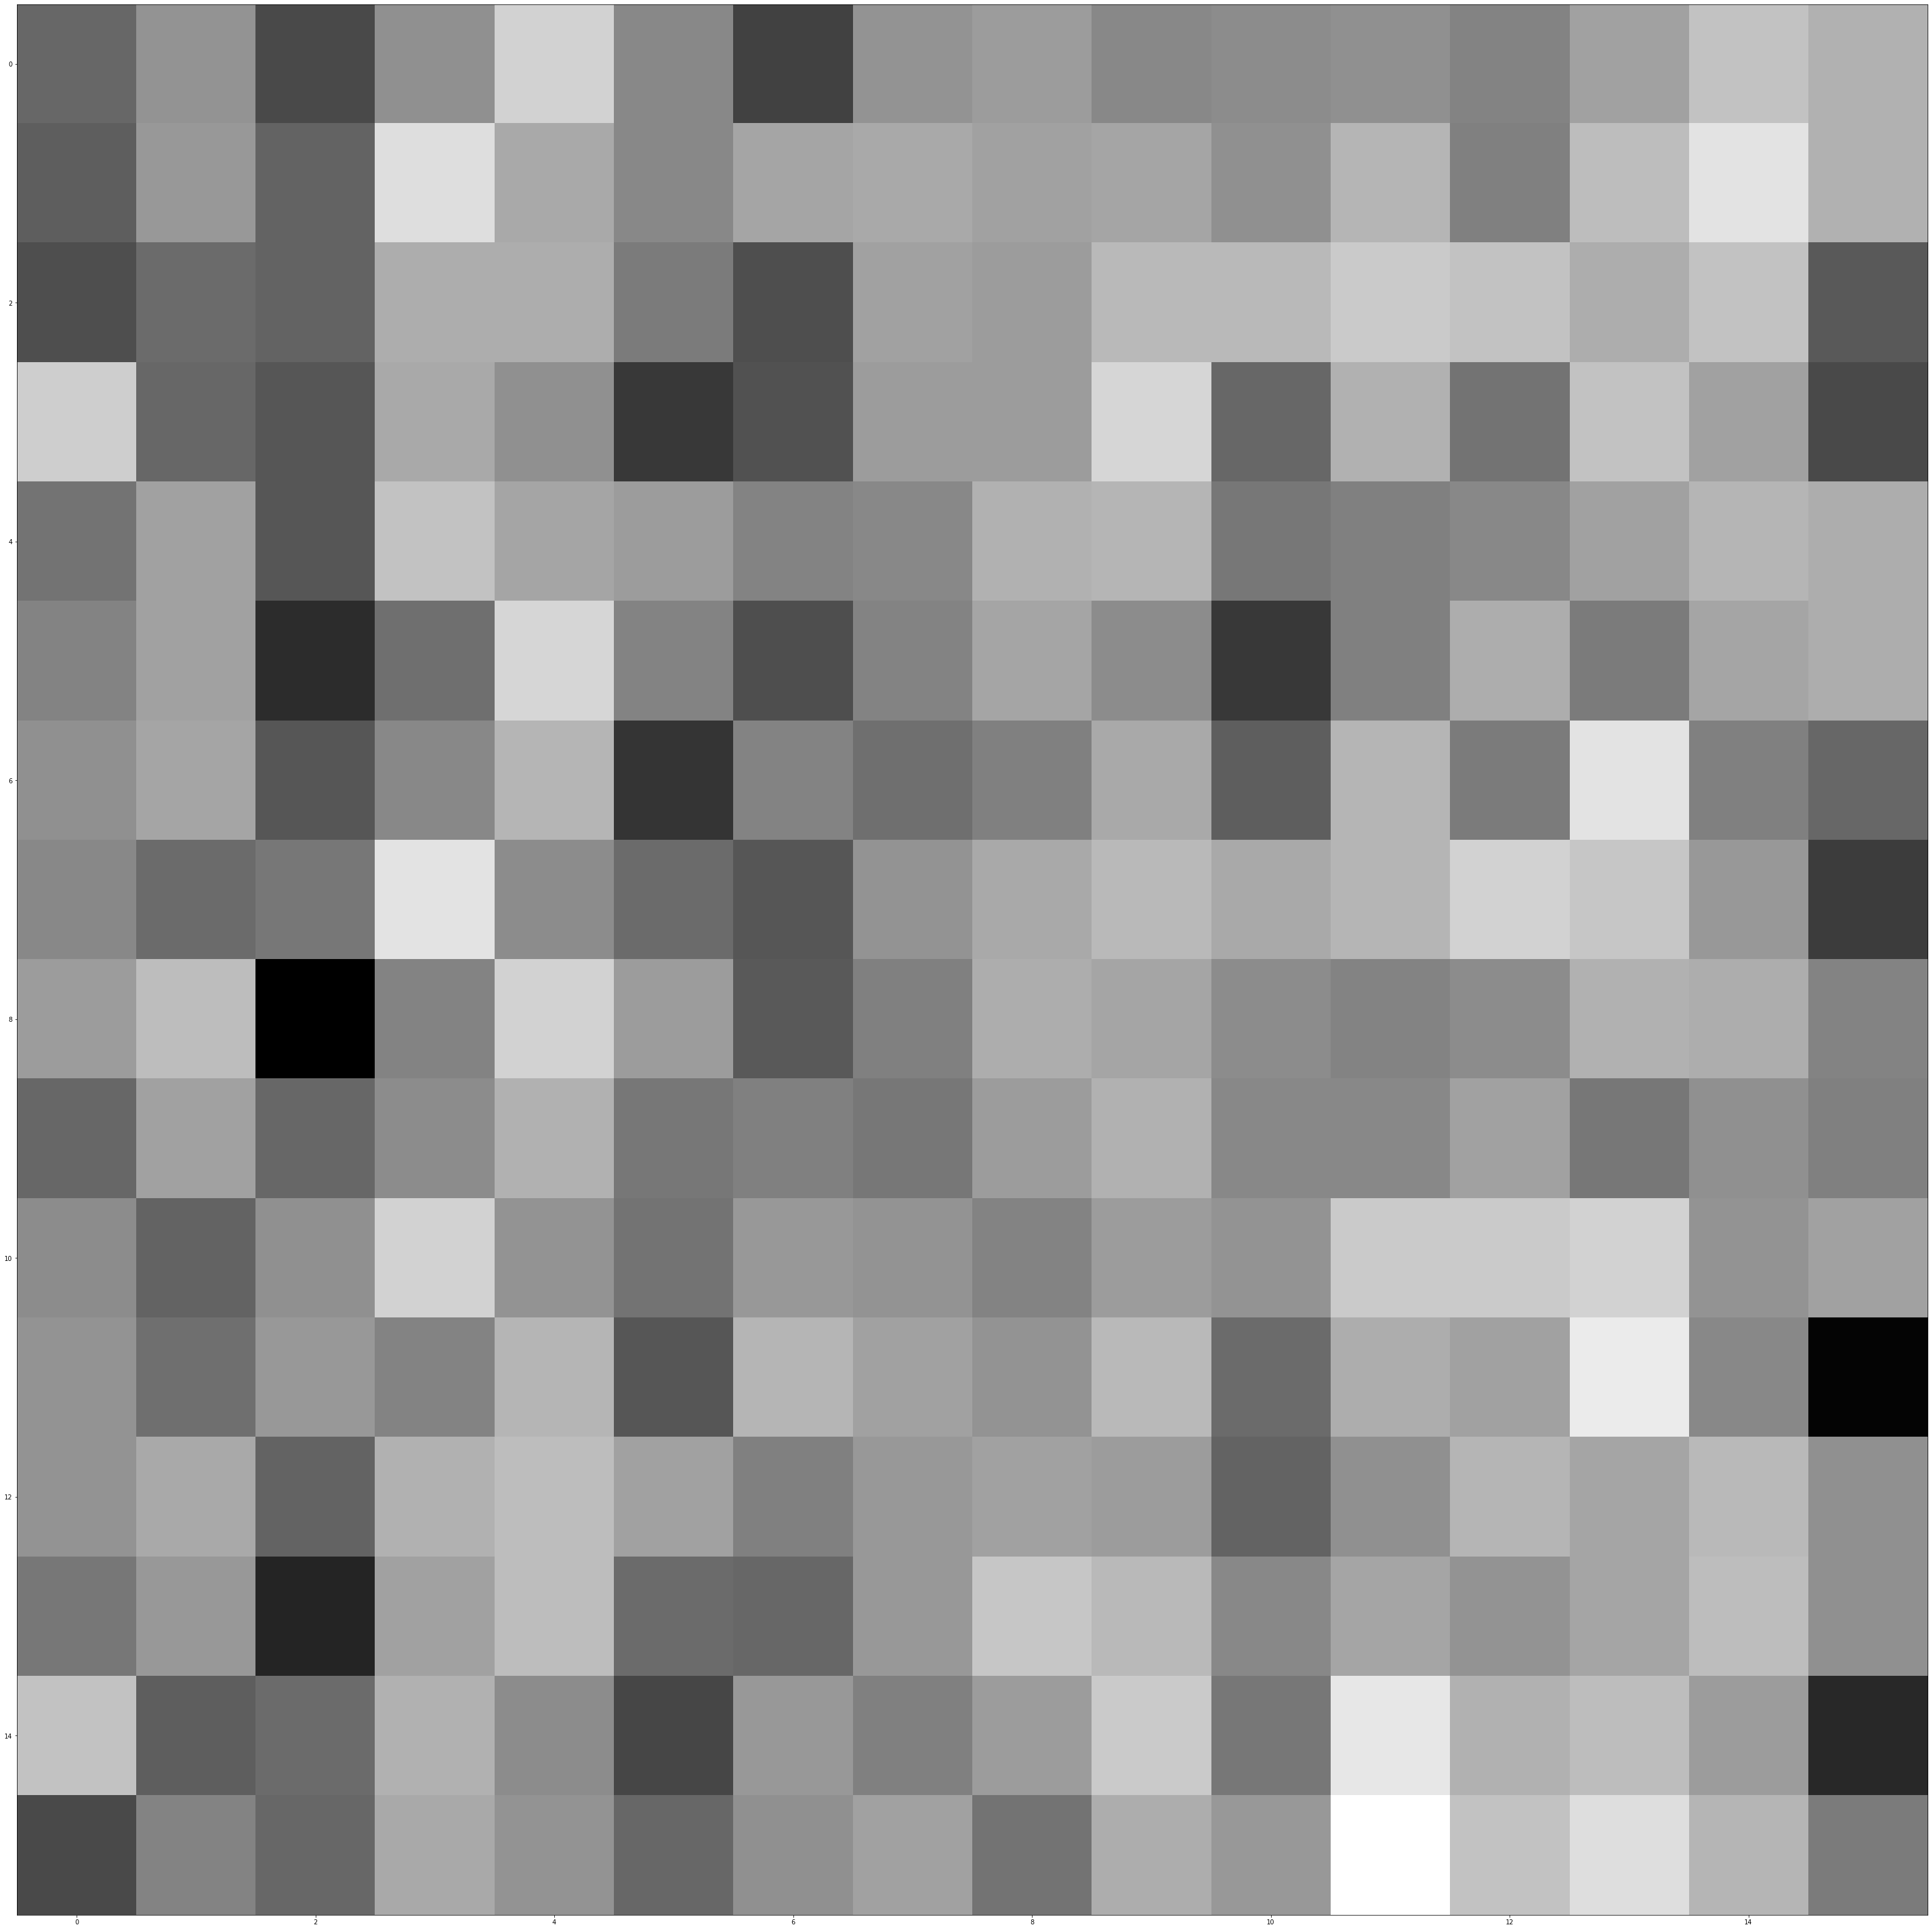

In [95]:
print(test_labels)
fig ,ax= plt.subplots(1, figsize=(56, 56))
plt.imshow(test_images[3],cmap="gray")
# ax[1].imshow(test_images[1],cmap="gray")


### Create the convolutional base

Let's display the architecture of your model so far:

In [85]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(8, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
#
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

Here's the complete architecture of your model:

In [86]:
# model.summary()

In [87]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True),  metrics=['accuracy'])



history = model.fit(train_images, train_labels, epochs=1000,
                    validation_data=(test_images, test_labels))



Epoch 1/1000


/opt/anaconda/envs/RR/lib/python3.6/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


2/2 [==============================] - 2s 1s/step - loss: 0.7154 - accuracy: 0.4167 - val_loss: 0.7120 - val_accuracy: 0.4000
Epoch 2/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.6725 - accuracy: 0.5833 - val_loss: 0.7275 - val_accuracy: 0.4000
Epoch 3/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.7225 - accuracy: 0.5000 - val_loss: 0.7223 - val_accuracy: 0.4000
Epoch 4/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6951 - accuracy: 0.6111 - val_loss: 0.7095 - val_accuracy: 0.4000
Epoch 5/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.7006 - accuracy: 0.5000 - val_loss: 0.6957 - val_accuracy: 0.4000
Epoch 6/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.7044 - accuracy: 0.5556 - val_loss: 0.6854 - val_accuracy: 0.6000
Epoch 7/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7074 - accuracy: 0.4444 - val_loss: 0.6809 - val_accuracy: 0.6000
Epoch 8/1000
2/2 [==========

In [88]:
y_pred=model.predict(teste_images_predic)
y_pred_max = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_max)
print(test_labels_predic)
print(classification_report(test_labels_predic, y_pred_max))


[[0.43958116 0.56041884]
 [0.43958116 0.56041884]
 [0.43958116 0.56041884]
 [0.43958116 0.56041884]
 [0.43958116 0.56041884]
 [0.43958116 0.56041884]
 [0.43958116 0.56041884]
 [0.43958116 0.56041884]
 [0.43958116 0.56041884]
 [0.43958116 0.56041884]
 [0.43958116 0.56041884]
 [0.43958116 0.56041884]]
[1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 0 0 0 1 0 0 0 1 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.42      1.00      0.59         5

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12



/opt/anaconda/envs/RR/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluate the model

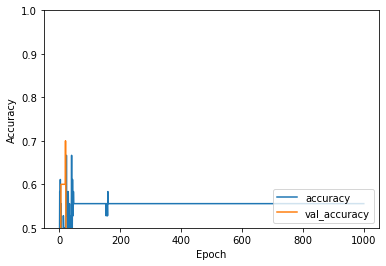

In [89]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [90]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

1/1 - 0s - loss: 0.7248 - accuracy: 0.4000
0.4000000059604645


In [91]:
test_loss, test_acc = model.evaluate(teste_images_predic,  test_labels_predic, verbose=2)
print(test_acc)



1/1 - 0s - loss: 0.7207 - accuracy: 0.4167
0.4166666567325592


In [92]:

# tf.keras.utils.plot_model(model, to_file= 'model_test.png', show_shapes=True, show_layer_names=True,
#                           dpi=600)

### Results com novos valores Genêricos
# figure = plt.figure(figsize=(20, 7))
# sns.heatmap(, annot=True, cmap=plt.cm.Reds)
# plt.ylabel('True label', size=30)
# plt.xlabel('Predicted label', size=30)
#
# plt.xticks(size=20)
# plt.yticks(size=20)
# plt.savefig(base_imagem + "confusion_matrix.pdf", dpi=600)
# plt.show()